# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# formatting the output
pd.options.display.float_format= '{:.2f}'.format

# Load the Data

In [3]:
path = "C:\\Users\\hp\\Downloads\\Portfolio Projects\\P1\\Data_set\\Oil well.csv"
df = pd.read_csv(path, skiprows=2) ## Skipping the first two rows(skiprows=2)

In [4]:
df.columns = df.columns.str.strip().str.replace('\n', ' ')

# EDA - Exploratory Data Analysis

In [5]:
df.head()
df.info()
df.describe()

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm)
0,1/1/2013,49,70,13055,21,29,24,1819,214
1,1/2/2013,49,70,13055,21,29,24,1836,214
2,1/3/2013,49,70,13055,21,29,24,1788,214
3,1/4/2013,49,70,13055,21,29,24,1789,214
4,1/5/2013,44,70,11768,26,36,24,1825,214


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       2939 non-null   object
 1   Oil volume (m3/day)        2939 non-null   int64 
 2   Volume of liquid (m3/day)  2939 non-null   int64 
 3   Gas volume (m3/day)        2939 non-null   int64 
 4   Water volume (m3/day)      2939 non-null   int64 
 5   Water cut (%)              2939 non-null   int64 
 6   Working hours              2939 non-null   int64 
 7   Dynamic level (m)          2939 non-null   int64 
 8   Reservoir pressure (atm)   2939 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 206.8+ KB


,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm)
count,2939.00,2939.00,2939.00,2939.00,2939.00,2939.00,2939.00,2939.00
mean,17.62,59.46,4730.15,41.83,70.69,22.34,1930.38,157.02
std,9.69,18.63,2598.89,13.06,9.53,3.04,114.54,32.92
min,0.00,12.00,4.00,9.00,29.00,7.00,1529.00,100.00
25%,11.00,50.00,3041.50,33.00,69.00,22.00,1855.00,129.00
50%,15.00,58.00,3909.00,43.00,73.00,24.00,1890.00,157.00
75%,22.00,74.00,5843.50,50.00,76.00,24.00,2008.00,185.50
max,49.00,113.00,13113.00,99.00,100.00,24.00,2137.00,214.00


In [6]:
df.isnull().sum()
df.duplicated().sum()

Date                         0
Oil volume (m3/day)          0
Volume of liquid (m3/day)    0
Gas volume (m3/day)          0
Water volume (m3/day)        0
Water cut (%)                0
Working hours                0
Dynamic level (m)            0
Reservoir pressure (atm)     0
dtype: int64

np.int64(0)

# Feature Engineering

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       2939 non-null   datetime64[ns]
 1   Oil volume (m3/day)        2939 non-null   int64         
 2   Volume of liquid (m3/day)  2939 non-null   int64         
 3   Gas volume (m3/day)        2939 non-null   int64         
 4   Water volume (m3/day)      2939 non-null   int64         
 5   Water cut (%)              2939 non-null   int64         
 6   Working hours              2939 non-null   int64         
 7   Dynamic level (m)          2939 non-null   int64         
 8   Reservoir pressure (atm)   2939 non-null   int64         
 9   Year                       2939 non-null   int32         
 10  Month                      2939 non-null   int32         
 11  Month_Name                 2939 non-null   object        
dtypes: dat

In [9]:
# Calculate Cumulative Sums
df['Cumulative_Oil'] = df['Oil volume (m3/day)'].cumsum()
df['Cumulative_Water'] = df['Water volume (m3/day)'].cumsum()
df['Cumulative_Gas'] = df['Gas volume (m3/day)'].cumsum()

In [10]:
# Calculate GOR
df['GOR'] = df.apply(lambda row: row['Gas volume (m3/day)'] / row['Oil volume (m3/day)'] if row['Oil volume (m3/day)'] != 0 else 0, axis=1)

In [11]:
# Calculate Rates per hour
df['Oil_Rate'] = df.apply(lambda row: row['Oil volume (m3/day)'] / row['Working hours'] if row['Working hours'] != 0 else 0, axis=1)
df['Water_Rate'] = df.apply(lambda row: row['Water volume (m3/day)'] / row['Working hours'] if row['Working hours'] != 0 else 0, axis=1)
df['Gas_Rate'] = df.apply(lambda row: row['Gas volume (m3/day)'] / row['Working hours'] if row['Working hours'] != 0 else 0, axis=1)

In [12]:
# Monthly Aggregation
monthly = df.resample('M', on='Date').agg({
    'Oil volume (m3/day)': 'sum',
    'Water volume (m3/day)': 'sum',
    'Gas volume (m3/day)': 'sum',
    'Water cut (%)': 'mean',
    'GOR': 'mean',
    'Dynamic level (m)': 'mean',
    'Reservoir pressure (atm)': 'mean',
    'Working hours': 'sum'
}).reset_index()

# Rename the columns to reflect monthly values
monthly.rename(columns={
    'Oil volume (m3/day)': 'Monthly_Oil',
    'Water volume (m3/day)': 'Monthly_Water',
    'Gas volume (m3/day)': 'Monthly_Gas',
    'Water cut (%)': 'Average_Water_Cut',
    'GOR': 'Average_GOR',
    'Dynamic level (m)': 'Average_Dynamic_Level',
    'Reservoir pressure (atm)': 'Average_Reservoir_Pressure',
    'Working hours': 'Total_Working_Hours'
}, inplace=True)

In [13]:
# Calculate the average daily oil production for the month (assuming 30 days per month for simplicity, but you can use actual days in month)
monthly['Days_in_Month'] = monthly['Date'].dt.daysinmonth
monthly['Average_Daily_Oil'] = monthly['Monthly_Oil'] / monthly['Days_in_Month']

In [14]:
monthly

,Date,Monthly_Oil,Monthly_Water,Monthly_Gas,Average_Water_Cut,Average_GOR,Average_Dynamic_Level,Average_Reservoir_Pressure,Total_Working_Hours,Days_in_Month,Average_Daily_Oil
0,2013-01-31,1375,778,366554,35.19,266.58,1787.65,213.42,744,31,44.35
1,2013-02-28,1295,782,347353,36.32,268.25,1800.57,212.29,672,28,46.25
2,2013-03-31,1354,951,365416,39.65,269.90,1858.90,211.19,744,31,43.68
3,2013-04-30,1261,1052,338617,44.27,268.58,1864.60,209.93,720,30,42.03
4,2013-05-31,1288,1158,346335,46.10,268.98,1878.16,208.71,744,31,41.55
...,...,...,...,...,...,...,...,...,...,...,...
92,2020-09-30,255,639,69430,70.60,272.81,2122.00,104.80,528,30,8.50
93,2020-10-31,247,695,65393,73.45,265.33,2122.00,103.65,536,31,7.97
94,2020-11-30,177,505,47110,73.63,267.34,2122.00,102.50,524,30,5.90
95,2020-12-31,147,448,39589,74.39,270.48,2120.35,101.35,475,31,4.74


In [15]:
df.head()

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm),Year,Month,Month_Name,Cumulative_Oil,Cumulative_Water,Cumulative_Gas,GOR,Oil_Rate,Water_Rate,Gas_Rate
0,2013-01-01,49,70,13055,21,29,24,1819,214,2013,1,January,49,21,13055,266.43,2.04,0.88,543.96
1,2013-01-02,49,70,13055,21,29,24,1836,214,2013,1,January,98,42,26110,266.43,2.04,0.88,543.96
2,2013-01-03,49,70,13055,21,29,24,1788,214,2013,1,January,147,63,39165,266.43,2.04,0.88,543.96
3,2013-01-04,49,70,13055,21,29,24,1789,214,2013,1,January,196,84,52220,266.43,2.04,0.88,543.96
4,2013-01-05,44,70,11768,26,36,24,1825,214,2013,1,January,240,110,63988,267.45,1.83,1.08,490.33


In [16]:
monthly['Monthly_Decline_Rate'] = monthly['Monthly_Oil'].pct_change() * -100
    

In [17]:
# Monthly production aggregation (average)
monthly_production = df.resample('M', on='Date').agg({
    'Oil volume (m3/day)': 'mean',  
    'Water volume (m3/day)': 'mean',
    'Gas volume (m3/day)': 'mean',
    'Water cut (%)': 'mean',
    'GOR': 'mean',
    'Dynamic level (m)': 'mean',
    'Reservoir pressure (atm)': 'mean',
    'Working hours': 'sum'
}).reset_index()


monthly_production.rename(columns={'Oil volume (m3/day)': 'Oil volume (m3/day)_mean'}, inplace=True)


yearly = df.resample('Y', on='Date').agg({
    'Oil volume (m3/day)': 'mean',   
    'Water volume (m3/day)': 'mean',
    'Gas volume (m3/day)': 'mean',
    'Water cut (%)': 'mean',
    'GOR': 'mean',
    'Dynamic level (m)': 'mean',
    'Reservoir pressure (atm)': 'mean',
    'Working hours': 'sum'
    }).reset_index()
    
yearly['Yearly_Decline_Rate'] = yearly['Oil volume (m3/day)'].pct_change() * -100

In [18]:
monthly.head()
yearly.head()

,Date,Monthly_Oil,Monthly_Water,Monthly_Gas,Average_Water_Cut,Average_GOR,Average_Dynamic_Level,Average_Reservoir_Pressure,Total_Working_Hours,Days_in_Month,Average_Daily_Oil,Monthly_Decline_Rate
0,2013-01-31,1375,778,366554,35.19,266.58,1787.65,213.42,744,31,44.35,NaN
1,2013-02-28,1295,782,347353,36.32,268.25,1800.57,212.29,672,28,46.25,5.82
2,2013-03-31,1354,951,365416,39.65,269.90,1858.90,211.19,744,31,43.68,-4.56
3,2013-04-30,1261,1052,338617,44.27,268.58,1864.60,209.93,720,30,42.03,6.87
4,2013-05-31,1288,1158,346335,46.10,268.98,1878.16,208.71,744,31,41.55,-2.14


,Date,Oil volume (m3/day),Water volume (m3/day),Gas volume (m3/day),Water cut (%),GOR,Dynamic level (m),Reservoir pressure (atm),Working hours,Yearly_Decline_Rate
0,2013-12-31,36.63,44.61,9822.49,52.99,268.10,1851.81,206.94,8759,NaN
1,2014-12-31,24.39,56.20,6552.03,68.82,268.04,1880.16,192.78,8626,33.41
2,2015-12-31,21.10,50.65,5654.84,70.07,267.43,1886.36,178.65,8314,13.49
3,2016-12-31,13.33,47.58,3592.20,77.43,269.46,1865.29,164.49,8381,36.82
4,2017-12-31,14.81,37.52,3981.83,70.93,268.91,1853.32,150.30,8705,-11.10


In [19]:

df['Rolling_30d_Avg'] = df['Oil volume (m3/day)'].rolling(window=30, min_periods=15).mean()
df['Rolling_Decline_Rate'] = df['Rolling_30d_Avg'].pct_change(periods=30) * -100

In [20]:
df.sample(10)

,Date,Oil volume (m3/day),Volume of liquid (m3/day),Gas volume (m3/day),Water volume (m3/day),Water cut (%),Working hours,Dynamic level (m),Reservoir pressure (atm),Year,...,Month_Name,Cumulative_Oil,Cumulative_Water,Cumulative_Gas,GOR,Oil_Rate,Water_Rate,Gas_Rate,Rolling_30d_Avg,Rolling_Decline_Rate
1306,2016-07-31,14,58,3650,44,76,24,1903,163,2016,...,July,32811,65960,8802783,260.71,0.58,1.83,152.08,13.13,-56.35
241,2013-08-30,39,86,10391,47,54,24,1904,205,2013,...,August,9961,8759,2671069,266.44,1.62,1.96,432.96,36.73,4.26
551,2014-07-06,20,80,5464,60,74,24,1838,193,2014,...,July,17900,27689,4800942,273.20,0.83,2.50,227.67,20.73,23.49
162,2013-06-12,36,79,9753,43,53,24,1890,208,2013,...,June,7005,5237,1879241,270.92,1.50,1.79,406.38,38.53,8.69
375,2014-01-11,24,89,6312,65,73,24,1864,199,2014,...,January,13612,17035,3649043,263.00,1.00,2.71,263.00,22.33,6.16
810,2015-03-22,22,77,5858,55,71,24,1960,183,2015,...,March,23963,40767,6429300,266.27,0.92,2.29,244.08,19.13,-3.05
2800,2020-09-02,10,36,2729,26,71,20,2122,105,2020,...,September,50895,120448,13659553,272.90,0.50,1.30,136.45,8.10,3.95
521,2014-06-06,21,76,5612,55,72,22,1955,194,2014,...,June,17278,25893,4632658,267.24,0.95,2.50,255.09,27.10,6.12
2607,2020-02-22,9,38,2465,28,75,17,2134,113,2020,...,February,49359,116135,13248767,273.89,0.53,1.65,145.00,9.03,-23.18
1396,2016-10-29,13,57,3438,44,77,24,1879,160,2016,...,October,33965,69999,9113163,264.46,0.54,1.83,143.25,11.40,10.47


# Analyze the Data

## Production Performance Analysis


In [21]:

print("=== PRODUCTION PERFORMANCE ANALYSIS ===")
print(f"Analysis Period: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total Days of Data: {len(df):,}")
print(f"Days with Production: {(df['Oil volume (m3/day)'] > 0).sum():,}")

=== PRODUCTION PERFORMANCE ANALYSIS ===
Analysis Period: 2013-01-01 to 2021-01-18
Total Days of Data: 2,939
Days with Production: 2,938


In [22]:
# Calculate key production metrics
production_stats = {
    'First_Production': df['Oil volume (m3/day)'].iloc[0],
    'Last_Production': df['Oil volume (m3/day)'].iloc[-1],
    'Peak_Production': df['Oil volume (m3/day)'].max(),
    'Average_Production': df['Oil volume (m3/day)'].mean(),
    'Total_Cumulative_Oil': df['Oil volume (m3/day)'].sum(),
    'Production_Days': (df['Oil volume (m3/day)'] > 0).sum(),
    'Zero_Production_Days': (df['Oil volume (m3/day)'] == 0).sum()
}

print("\n📊 KEY PRODUCTION METRICS:")
print(f"• First Production Rate: {production_stats['First_Production']:.1f} m³/day")
print(f"• Last Production Rate: {production_stats['Last_Production']:.1f} m³/day")
print(f"• Peak Production Rate: {production_stats['Peak_Production']:.1f} m³/day")
print(f"• Average Production Rate: {production_stats['Average_Production']:.1f} m³/day")
print(f"• Total Cumulative Oil: {production_stats['Total_Cumulative_Oil']:,.0f} m³")
print(f"• Zero Production Days: {production_stats['Zero_Production_Days']:,} days")


📊 KEY PRODUCTION METRICS:
• First Production Rate: 49.0 m³/day
• Last Production Rate: 5.0 m³/day
• Peak Production Rate: 49.0 m³/day
• Average Production Rate: 17.6 m³/day
• Total Cumulative Oil: 51,798 m³
• Zero Production Days: 1 days


In [23]:
def identify_production_phases(df):
    phases = []

    # Sort by date to ensure correct order
    df = df.sort_values(by='Date').reset_index(drop=True)

    # 1️⃣ Early Production Phase – first 6 months
    early_end = df['Date'].min() + pd.DateOffset(months=6)
    early_phase = df[df['Date'] <= early_end]
    phases.append({
        'Phase': 'Early Production',
        'Start': early_phase['Date'].min(),
        'End': early_phase['Date'].max(),
        'Avg_Production': early_phase['Oil volume (m3/day)'].mean(),
        'Days': len(early_phase)
    })

    # 2️⃣ Plateau Phase – more flexible threshold
    peak_production = df['Oil volume (m3/day)'].max()
    plateau_threshold = peak_production * 0.7  # 70% of peak
    plateau_mask = (df['Oil volume (m3/day)'] >= plateau_threshold) & (df['Date'] > early_end)
    plateau_periods = df[plateau_mask].groupby((~plateau_mask).cumsum())

    longest_plateau = None
    for _, period in plateau_periods:
        if longest_plateau is None or len(period) > len(longest_plateau):
            longest_plateau = period

    if longest_plateau is not None and len(longest_plateau) >= 15:  # at least 15 days
        plateau_end = longest_plateau['Date'].max()
        phases.append({
            'Phase': 'Plateau',
            'Start': longest_plateau['Date'].min(),
            'End': plateau_end,
            'Avg_Production': longest_plateau['Oil volume (m3/day)'].mean(),
            'Days': len(longest_plateau)
        })
    else:
        plateau_end = early_end
        print("⚠️ No clear plateau phase detected (production too variable or short).")

    # 3️⃣ Decline Phase – after plateau
    decline_phase = df[df['Date'] > plateau_end]
    if len(decline_phase) > 0:
        phases.append({
            'Phase': 'Decline',
            'Start': decline_phase['Date'].min(),
            'End': decline_phase['Date'].max(),
            'Avg_Production': decline_phase['Oil volume (m3/day)'].mean(),
            'Days': len(decline_phase)
        })

    return pd.DataFrame(phases)


production_phases = identify_production_phases(df)

print("\n🎯 PRODUCTION PHASES IDENTIFICATION:")
for _, phase in production_phases.iterrows():
    print(f"• {phase['Phase']}: {phase['Start'].strftime('%Y-%m-%d')} to {phase['End'].strftime('%Y-%m-%d')}")
    print(f"  Average Production: {phase['Avg_Production']:.1f} m³/day, Duration: {phase['Days']} days")



🎯 PRODUCTION PHASES IDENTIFICATION:
• Early Production: 2013-01-01 to 2013-07-01
  Average Production: 42.4 m³/day, Duration: 182 days
• Plateau: 2013-07-02 to 2013-08-04
  Average Production: 38.3 m³/day, Duration: 34 days
• Decline: 2013-08-05 to 2021-01-18
  Average Production: 15.7 m³/day, Duration: 2723 days


In [24]:

# Yearly production analysis
yearly_production = df.resample('Y', on='Date').agg({
    'Oil volume (m3/day)': ['mean', 'sum', 'std'],
    'Water cut (%)': 'mean',
    'Gas volume (m3/day)': 'mean',
    'Working hours': 'sum'
}).round(2)

yearly_production.columns = ['_'.join(col).strip() for col in yearly_production.columns.values]
yearly_production = yearly_production.reset_index()

print("\n📈 YEARLY PRODUCTION SUMMARY:")
for _, year in yearly_production.iterrows():
    year_label = year['Date'].year
    print(f"• {year_label}: Avg {year['Oil volume (m3/day)_mean']:.1f} m³/day, "
          f"Total {year['Oil volume (m3/day)_sum']:,.0f} m³, "
          f"Water Cut {year['Water cut (%)_mean']:.1f}%")


📈 YEARLY PRODUCTION SUMMARY:
• 2013: Avg 36.6 m³/day, Total 13,371 m³, Water Cut 53.0%
• 2014: Avg 24.4 m³/day, Total 8,904 m³, Water Cut 68.8%
• 2015: Avg 21.1 m³/day, Total 7,682 m³, Water Cut 70.1%
• 2016: Avg 13.3 m³/day, Total 4,880 m³, Water Cut 77.4%
• 2017: Avg 14.8 m³/day, Total 5,407 m³, Water Cut 70.9%
• 2018: Avg 13.3 m³/day, Total 4,841 m³, Water Cut 76.4%
• 2019: Avg 10.5 m³/day, Total 3,839 m³, Water Cut 75.4%
• 2020: Avg 7.6 m³/day, Total 2,777 m³, Water Cut 73.5%
• 2021: Avg 5.4 m³/day, Total 97 m³, Water Cut 70.8%


In [25]:
# Calculate performance indicators
performance_metrics = {
    'Overall_Decline_Rate': ((df['Oil volume (m3/day)'].iloc[0] - df['Oil volume (m3/day)'].iloc[-1]) / 
                            df['Oil volume (m3/day)'].iloc[0] * 100),
    'Production_Consistency': (df['Oil volume (m3/day)'].std() / df['Oil volume (m3/day)'].mean() * 100),
    'Best_Month_Production': monthly['Average_Daily_Oil'].max(),
    'Worst_Month_Production': monthly['Average_Daily_Oil'].min(),
    'Peak_to_Current_Ratio': (df['Oil volume (m3/day)'].max() / df['Oil volume (m3/day)'].iloc[-1]),
    'Production_Efficiency': (df['Working hours'].sum() / (len(df) * 24) * 100)
}

print("\n📊 PRODUCTION PERFORMANCE INDICATORS:")
print(f"• Overall Decline Rate: {performance_metrics['Overall_Decline_Rate']:.1f}%")
print(f"• Production Consistency (CV): {performance_metrics['Production_Consistency']:.1f}%")
print(f"• Best Month Average: {performance_metrics['Best_Month_Production']:.1f} m³/day")
print(f"• Worst Month Average: {performance_metrics['Worst_Month_Production']:.1f} m³/day")
print(f"• Peak to Current Ratio: {performance_metrics['Peak_to_Current_Ratio']:.1f}")
print(f"• Well Utilization Efficiency: {performance_metrics['Production_Efficiency']:.1f}%")


📊 PRODUCTION PERFORMANCE INDICATORS:
• Overall Decline Rate: 89.8%
• Production Consistency (CV): 55.0%
• Best Month Average: 46.2 m³/day
• Worst Month Average: 3.1 m³/day
• Peak to Current Ratio: 9.8
• Well Utilization Efficiency: 93.1%


In [26]:
print("=== Comparison Between Decline Types ===")

# Last rolling decline
last_rolling = df['Rolling_Decline_Rate'].iloc[-1]

# Last monthly decline  
last_monthly = monthly['Monthly_Decline_Rate'].iloc[-1]

# Last yearly decline
last_yearly = yearly['Yearly_Decline_Rate'].iloc[-1]

print(f"Rolling Decline (last 30 days): {last_rolling:.2f}%")
print(f"Monthly Decline (last month): {last_monthly:.2f}%")
print(f"Yearly Decline (last year): {last_yearly:.2f}%")

=== Comparison Between Decline Types ===
Rolling Decline (last 30 days): 1.29%
Monthly Decline (last month): 34.01%
Yearly Decline (last year): 28.98%


In [27]:
# Analyze current development stage based on production behavior
def analyze_development_stage(df, production_phases):
    current_date = df['Date'].max()
    current_production = df['Oil volume (m3/day)'].iloc[-1]
    peak_production = df['Oil volume (m3/day)'].max()
    current_water_cut = df['Water cut (%)'].iloc[-1]
    cumulative_oil = df['Oil volume (m3/day)'].sum()
    
    # Determine development stage
    if current_production >= peak_production * 0.8:
        stage = "Plateau Phase"
        stage_description = "Well is in peak production period with stable output"
    elif current_production >= peak_production * 0.4:
        stage = "Early Decline Phase"
        stage_description = "Initial production decline with moderate water cut"
    elif current_production >= peak_production * 0.2:
        stage = "Mid Decline Phase"
        stage_description = "Significant production decline, water cut increasing"
    elif current_production >= peak_production * 0.1:
        stage = "Late Decline Phase"
        stage_description = "Low production rates, high water cut"
    else:
        stage = "Tail End Phase"
        stage_description = "Very low production, approaching economic limit"
    
    # Calculate stage metrics
    stage_metrics = {
        'Current_Stage': stage,
        'Stage_Description': stage_description,
        'Current_Production_Rate': current_production,
        'Percentage_of_Peak': (current_production / peak_production) * 100,
        'Current_Water_Cut': current_water_cut,
        'Cumulative_Production': cumulative_oil,
        'Years_in_Production': (current_date - df['Date'].min()).days / 365.25,
        'Months_Since_Peak': ((current_date - df[df['Oil volume (m3/day)'] == peak_production]['Date'].iloc[0]).days / 30)
    }
    
    return stage_metrics

development_stage = analyze_development_stage(df, production_phases)

print("🎯 CURRENT FIELD DEVELOPMENT STAGE ANALYSIS")
print("=" * 50)
print(f"Development Stage: {development_stage['Current_Stage']}")
print(f"Stage Description: {development_stage['Stage_Description']}")
print(f"Current Production: {development_stage['Current_Production_Rate']:.1f} m³/day")
print(f"Percentage of Peak: {development_stage['Percentage_of_Peak']:.1f}%")
print(f"Current Water Cut: {development_stage['Current_Water_Cut']:.1f}%")
print(f"Cumulative Production: {development_stage['Cumulative_Production']:,.0f} m³")
print(f"Years in Production: {development_stage['Years_in_Production']:.1f} years")
print(f"Months Since Peak: {development_stage['Months_Since_Peak']:.1f} months")

🎯 CURRENT FIELD DEVELOPMENT STAGE ANALYSIS
Development Stage: Late Decline Phase
Stage Description: Low production rates, high water cut
Current Production: 5.0 m³/day
Percentage of Peak: 10.2%
Current Water Cut: 70.0%
Cumulative Production: 51,798 m³
Years in Production: 8.0 years
Months Since Peak: 98.0 months


In [28]:
# Advanced reserves estimation using multiple methods
def estimate_remaining_reserves(df):
    # Method 1: Decline Curve Analysis
    from scipy.optimize import curve_fit
    
    # Prepare monthly production data for DCA
    monthly_data = df.resample('M', on='Date')['Oil volume (m3/day)'].mean().dropna()
    time_index = np.arange(len(monthly_data))
    
    # Exponential decline model
    def exponential_decline(t, qi, di):
        return qi * np.exp(-di * t)
    
    # Hyperbolic decline model
    def hyperbolic_decline(t, qi, di, b):
        return qi / (1 + b * di * t) ** (1 / b)
    
    try:
        # Fit exponential decline
        popt_exp, _ = curve_fit(exponential_decline, time_index, monthly_data, 
                               p0=[monthly_data.iloc[0], 0.01], maxfev=5000)
        qi_exp, di_exp = popt_exp
        
        # Fit hyperbolic decline (more realistic for most wells)
        popt_hyp, _ = curve_fit(hyperbolic_decline, time_index, monthly_data,
                               p0=[monthly_data.iloc[0], 0.01, 0.5], 
                               bounds=([0, 0, 0], [1000, 1, 2]), maxfev=5000)
        qi_hyp, di_hyp, b_hyp = popt_hyp
        
        # Calculate remaining reserves
        economic_limit = 5  # m³/day - minimum economic production rate
        future_months = 240  # 20 years forecast
        
        # Exponential reserves
        time_to_el_exp = -np.log(economic_limit / qi_exp) / di_exp if di_exp > 0 else future_months
        remaining_reserves_exp = exponential_decline(np.arange(0, min(time_to_el_exp, future_months)), qi_exp, di_exp).sum()
        
        # Hyperbolic reserves
        time_to_el_hyp = ((qi_hyp / economic_limit) ** b_hyp - 1) / (b_hyp * di_hyp) if di_hyp > 0 else future_months
        remaining_reserves_hyp = hyperbolic_decline(np.arange(0, min(time_to_el_hyp, future_months)), qi_hyp, di_hyp, b_hyp).sum()
        
        # Method 2: Volumetric method (simplified)
        # Assuming recovery factor based on water cut and production history
        current_water_cut = df['Water cut (%)'].iloc[-1]
        if current_water_cut < 50:
            recovery_factor = 0.35  # Good recovery
        elif current_water_cut < 80:
            recovery_factor = 0.25  # Moderate recovery
        else:
            recovery_factor = 0.15  # Poor recovery
        
        estimated_oil_in_place = df['Oil volume (m3/day)'].sum() / recovery_factor
        remaining_volumetric = estimated_oil_in_place * (1 - recovery_factor) * 0.3  # Conservative estimate
        
        reserves = {
            'Exponential_Decline_Reserves': remaining_reserves_exp,
            'Hyperbolic_Decline_Reserves': remaining_reserves_hyp,
            'Volumetric_Reserves': remaining_volumetric,
            'Average_Remaining_Reserves': np.mean([remaining_reserves_exp, remaining_reserves_hyp, remaining_volumetric]),
            'Economic_Limit': economic_limit,
            'Estimated_Recovery_Factor': recovery_factor,
            'Estimated_Oil_In_Place': estimated_oil_in_place
        }
        
        return reserves, popt_exp, popt_hyp
        
    except Exception as e:
        print(f"Error in reserves estimation: {e}")
        return None, None, None

reserves_estimation, exp_params, hyp_params = estimate_remaining_reserves(df)

if reserves_estimation:
    print("\n🛢️ REMAINING OIL RESERVES ESTIMATION")
    print("=" * 50)
    print(f"Exponential Decline Method: {reserves_estimation['Exponential_Decline_Reserves']:,.0f} m³")
    print(f"Hyperbolic Decline Method: {reserves_estimation['Hyperbolic_Decline_Reserves']:,.0f} m³")
    print(f"Volumetric Method: {reserves_estimation['Volumetric_Reserves']:,.0f} m³")
    print(f"Average Remaining Reserves: {reserves_estimation['Average_Remaining_Reserves']:,.0f} m³")
    print(f"Estimated Oil in Place: {reserves_estimation['Estimated_Oil_In_Place']:,.0f} m³")
    print(f"Estimated Recovery Factor: {reserves_estimation['Estimated_Recovery_Factor']:.1%}")
    print(f"Economic Limit: {reserves_estimation['Economic_Limit']} m³/day")


🛢️ REMAINING OIL RESERVES ESTIMATION
Exponential Decline Method: 1,744 m³
Hyperbolic Decline Method: 2,489 m³
Volumetric Method: 46,618 m³
Average Remaining Reserves: 16,950 m³
Estimated Oil in Place: 207,192 m³
Estimated Recovery Factor: 25.0%
Economic Limit: 5 m³/day


##  Enhanced Oil Recovery (EOR) Decision Support

In [29]:
def eor_decision_support(df, reserves_estimation, economic_efficiency=None):
    current_conditions = {
        'Water_Cut': df['Water cut (%)'].iloc[-1],
        'Production_Rate': df['Oil volume (m3/day)'].iloc[-1],
        'GOR': df['GOR'].iloc[-1] if 'GOR' in df.columns else 0,
        'Cumulative_Production': df['Oil volume (m3/day)'].sum(),
        'Remaining_Reserves': reserves_estimation['Average_Remaining_Reserves'] if reserves_estimation else 0
    }
    
    eor_options = []
    
    # Evaluate different EOR methods based on current conditions
    if current_conditions['Water_Cut'] < 60:
        eor_options.append({
            'Method': 'Gas Injection',
            'Description': 'Maintain reservoir pressure and improve sweep efficiency',
            'Potential_Increase': '10-25%',
            'Cost_Range': 'Medium',
            'Suitability': 'High',
            'Implementation_Time': '3-6 months'
        })
    
    if 40 < current_conditions['Water_Cut'] < 85:
        eor_options.append({
            'Method': 'Chemical EOR (Polymer/Surfactant)',
            'Description': 'Improve water flooding efficiency and reduce water cut',
            'Potential_Increase': '15-30%',
            'Cost_Range': 'High',
            'Suitability': 'Medium-High',
            'Implementation_Time': '6-12 months'
        })
    
    if current_conditions['Water_Cut'] > 70:
        eor_options.append({
            'Method': 'Infill Drilling',
            'Description': 'Access unswept areas of the reservoir',
            'Potential_Increase': '20-40%',
            'Cost_Range': 'Very High',
            'Suitability': 'Medium',
            'Implementation_Time': '12-18 months'
        })
    
    # Always consider well optimization
    eor_options.append({
        'Method': 'Well Optimization',
        'Description': 'Optimize pumping parameters, clean wellbore, improve artificial lift',
        'Potential_Increase': '5-15%',
        'Cost_Range': 'Low',
        'Suitability': 'Very High',
        'Implementation_Time': '1-3 months'
    })
    
    return pd.DataFrame(eor_options)


# Generate recommendations
eor_recommendations = eor_decision_support(df, reserves_estimation)

print("\n🔄 ENHANCED OIL RECOVERY (EOR) RECOMMENDATIONS")
print("=" * 60)
for idx, recommendation in eor_recommendations.iterrows():
    print(f"\n{idx + 1}. {recommendation['Method']}")
    print(f"   Description: {recommendation['Description']}")
    print(f"   Potential Increase: {recommendation['Potential_Increase']}")
    print(f"   Cost: {recommendation['Cost_Range']}")
    print(f"   Suitability: {recommendation['Suitability']}")
    print(f"   Implementation Time: {recommendation['Implementation_Time']}")



🔄 ENHANCED OIL RECOVERY (EOR) RECOMMENDATIONS

1. Chemical EOR (Polymer/Surfactant)
   Description: Improve water flooding efficiency and reduce water cut
   Potential Increase: 15-30%
   Cost: High
   Suitability: Medium-High
   Implementation Time: 6-12 months

2. Well Optimization
   Description: Optimize pumping parameters, clean wellbore, improve artificial lift
   Potential Increase: 5-15%
   Cost: Low
   Suitability: Very High
   Implementation Time: 1-3 months


# Visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set style for professional visuals
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("📊 Starting Comprehensive Visualization Dashboard...")

📊 Starting Comprehensive Visualization Dashboard...


## Production Performance Visualizations

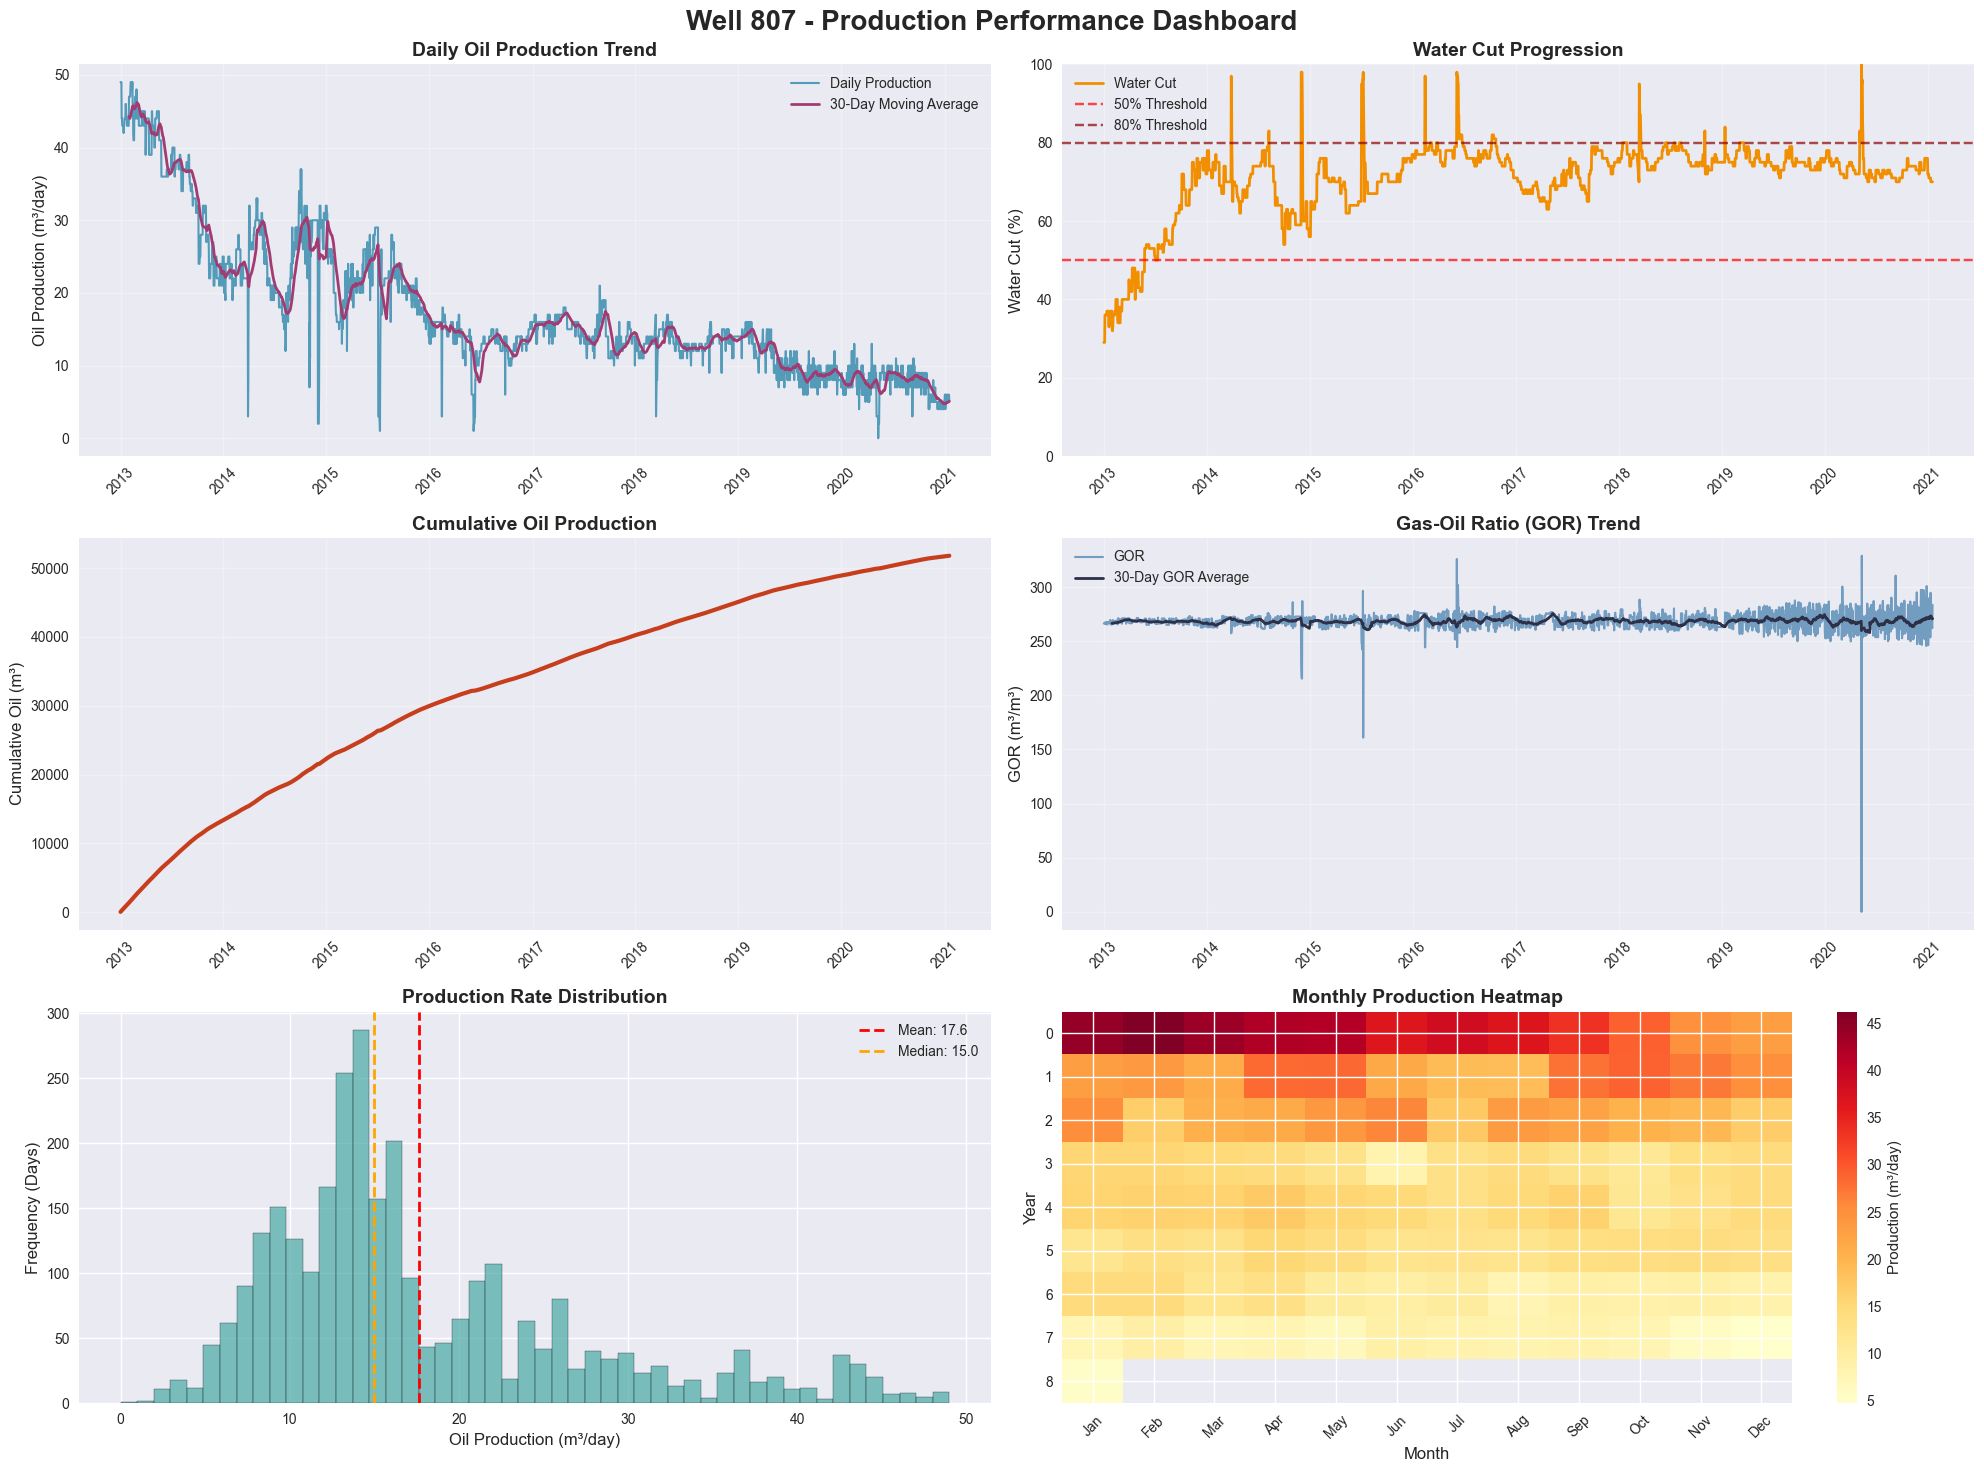

In [31]:
def production_performance(df):
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 15))
    fig.suptitle('Well 807 - Production Performance Dashboard', fontsize=20, fontweight='bold')
    
    # Plot 1: Daily Production Trend
    axes[0,0].plot(df['Date'], df['Oil volume (m3/day)'], 
                   color='#2E86AB', linewidth=1.5, alpha=0.8, label='Daily Production')
    
    # Add 30-day moving average
    df['30d_MA'] = df['Oil volume (m3/day)'].rolling(window=30).mean()
    axes[0,0].plot(df['Date'], df['30d_MA'], 
                   color='#A23B72', linewidth=2, label='30-Day Moving Average')
    
    axes[0,0].set_title('Daily Oil Production Trend', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Oil Production (m³/day)', fontsize=12)
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Water Cut Progression
    axes[0,1].plot(df['Date'], df['Water cut (%)'], 
                   color='#F18F01', linewidth=2, label='Water Cut')
    axes[0,1].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% Threshold')
    axes[0,1].axhline(y=80, color='darkred', linestyle='--', alpha=0.7, label='80% Threshold')
    axes[0,1].set_title('Water Cut Progression', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Water Cut (%)', fontsize=12)
    axes[0,1].set_ylim(0, 100)
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Cumulative Production
    df['Cumulative_Oil'] = df['Oil volume (m3/day)'].cumsum()
    axes[1,0].plot(df['Date'], df['Cumulative_Oil'], 
                   color='#C73E1D', linewidth=3, label='Cumulative Oil')
    axes[1,0].set_title('Cumulative Oil Production', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Cumulative Oil (m³)', fontsize=12)
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Plot 4: Gas-Oil Ratio (GOR)
    if 'GOR' in df.columns:
        axes[1,1].plot(df['Date'], df['GOR'], 
                       color='#3F7CAC', linewidth=1.5, alpha=0.7, label='GOR')
        df['GOR_30d_MA'] = df['GOR'].rolling(window=30).mean()
        axes[1,1].plot(df['Date'], df['GOR_30d_MA'], 
                       color='#2D3047', linewidth=2, label='30-Day GOR Average')
        axes[1,1].set_title('Gas-Oil Ratio (GOR) Trend', fontsize=14, fontweight='bold')
        axes[1,1].set_ylabel('GOR (m³/m³)', fontsize=12)
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        axes[1,1].tick_params(axis='x', rotation=45)
    
    # Plot 5: Production Distribution
    axes[2,0].hist(df['Oil volume (m3/day)'], bins=50, 
                   color='#48A9A6', alpha=0.7, edgecolor='black')
    axes[2,0].axvline(df['Oil volume (m3/day)'].mean(), color='red', 
                      linestyle='--', linewidth=2, label=f'Mean: {df["Oil volume (m3/day)"].mean():.1f}')
    axes[2,0].axvline(df['Oil volume (m3/day)'].median(), color='orange', 
                      linestyle='--', linewidth=2, label=f'Median: {df["Oil volume (m3/day)"].median():.1f}')
    axes[2,0].set_title('Production Rate Distribution', fontsize=14, fontweight='bold')
    axes[2,0].set_xlabel('Oil Production (m³/day)', fontsize=12)
    axes[2,0].set_ylabel('Frequency (Days)', fontsize=12)
    axes[2,0].legend()
    
    # Plot 6: Monthly Production Heatmap
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    monthly_pivot = df.pivot_table(values='Oil volume (m3/day)', 
                                   index='Year', columns='Month', aggfunc='mean')
    
    im = axes[2,1].imshow(monthly_pivot, cmap='YlOrRd', aspect='auto')
    axes[2,1].set_title('Monthly Production Heatmap', fontsize=14, fontweight='bold')
    axes[2,1].set_xlabel('Month', fontsize=12)
    axes[2,1].set_ylabel('Year', fontsize=12)
    plt.colorbar(im, ax=axes[2,1], label='Production (m³/day)')
    
    # Set month labels
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    axes[2,1].set_xticks(range(12))
    axes[2,1].set_xticklabels(months, rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Generate production dashboard
production_fig = production_performance(df)

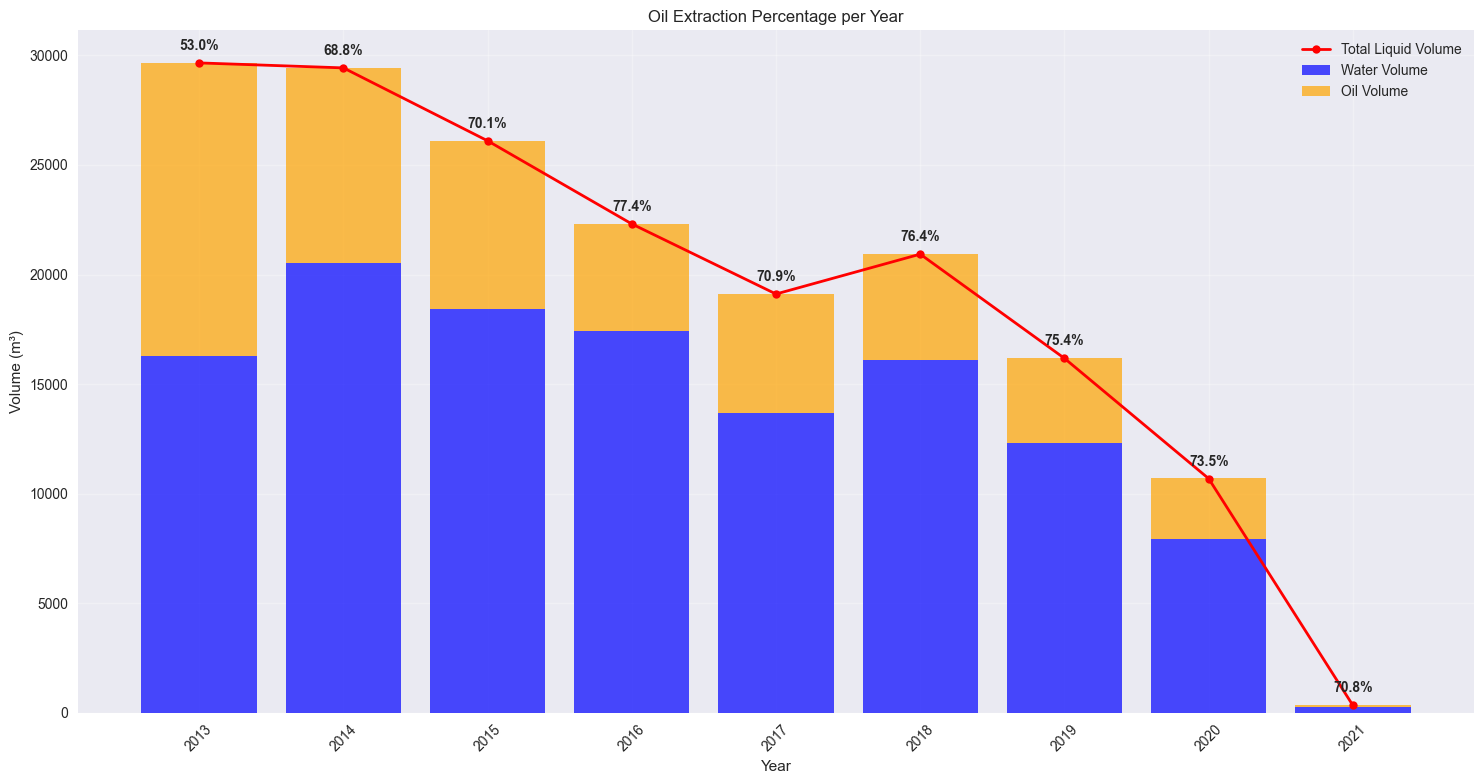

In [32]:
# Yearly data aggregation
total_liquids = df.groupby(df['Date'].dt.year).agg({
    'Water volume (m3/day)': 'sum',
    'Oil volume (m3/day)': 'sum',
    'Volume of liquid (m3/day)': 'sum',
    'Water cut (%)': 'mean'
}).reset_index()

# Ensure we have all years in sequence
all_years = pd.DataFrame({
    'Date': range(total_liquids['Date'].min(), total_liquids['Date'].max() + 1)
})
total_liquids = pd.merge(all_years, total_liquids, on='Date', how='left')

# Create the plot
plt.figure(figsize=(15, 8))

# Stacked bars for water and oil
plt.bar(total_liquids['Date'], total_liquids['Water volume (m3/day)'], 
        label='Water Volume', color='blue', alpha=0.7)
plt.bar(total_liquids['Date'], total_liquids['Oil volume (m3/day)'], 
        bottom=total_liquids['Water volume (m3/day)'], 
        label='Oil Volume', color='orange', alpha=0.7)

# Total liquid volume line
plt.plot(total_liquids['Date'], total_liquids['Volume of liquid (m3/day)'], 
         marker='o', color='red', linewidth=2, 
         label='Total Liquid Volume', markersize=6)

# Add water cut percentages
for i, year in enumerate(total_liquids['Date']):
    plt.text(year, 
             total_liquids['Volume of liquid (m3/day)'].iloc[i] + 
             total_liquids['Volume of liquid (m3/day)'].max() * 0.02,
             f"{total_liquids['Water cut (%)'].iloc[i]:.1f}%", 
             ha='center', fontsize=10, fontweight='bold')

# Formatting
plt.xlabel('Year')
plt.ylabel('Volume (m³)')
plt.title('Oil Extraction Percentage per Year')
plt.legend()
plt.grid(True, alpha=0.3)

# Ensure all years are shown on x-axis
plt.xticks(total_liquids['Date'], rotation=45)

plt.tight_layout()
plt.show();

## Decline Analysis Visualizations

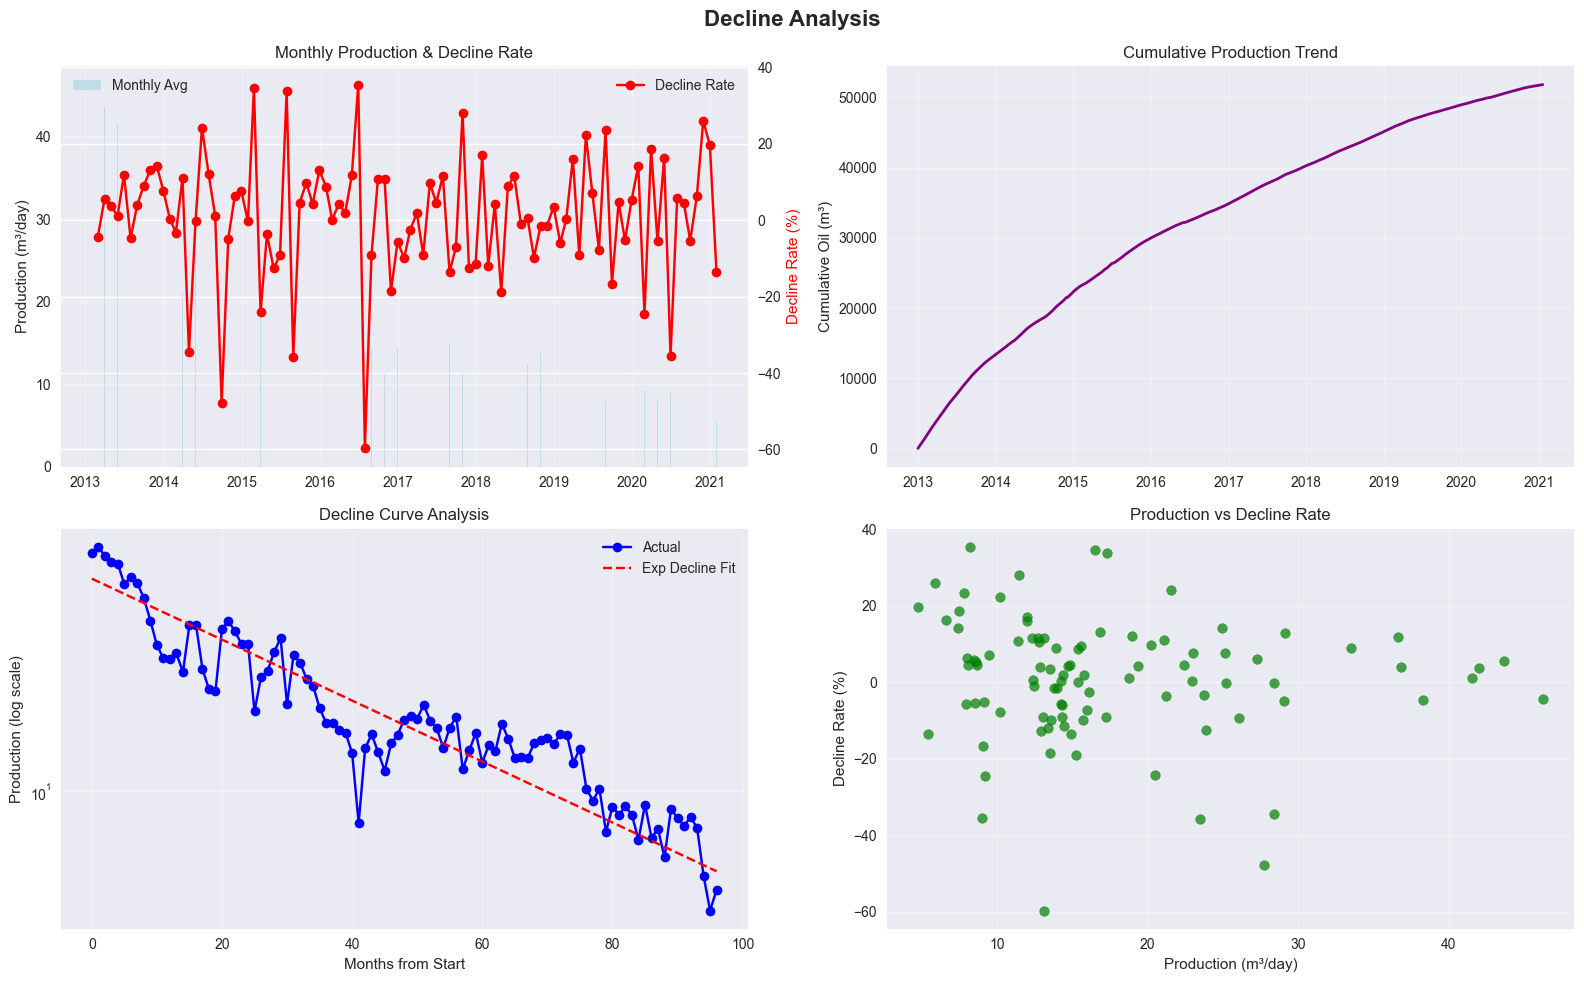

In [33]:
def create_decline_analysis_plots(df, monthly_production):
    """Decline analysis visualization only (no forecasting)"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Decline Analysis', fontsize=16, fontweight='bold')

    # 1️⃣ Monthly Production + Decline Rate
    monthly_production['Decline_Rate'] = monthly_production['Oil volume (m3/day)_mean'].pct_change() * -100
    ax1 = axes[0, 0]
    ax1.bar(monthly_production['Date'], monthly_production['Oil volume (m3/day)_mean'],
            color='lightblue', alpha=0.7, label='Monthly Avg')
    ax2 = ax1.twinx()
    ax2.plot(monthly_production['Date'], monthly_production['Decline_Rate'],
             color='red', marker='o', label='Decline Rate')
    ax1.set_title('Monthly Production & Decline Rate')
    ax1.set_ylabel('Production (m³/day)')
    ax2.set_ylabel('Decline Rate (%)', color='red')
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # 2️⃣ Cumulative Production
    axes[0, 1].plot(df['Date'], df['Cumulative_Oil'],
                    color='purple', linewidth=2)
    axes[0, 1].set_title('Cumulative Production Trend')
    axes[0, 1].set_ylabel('Cumulative Oil (m³)')
    axes[0, 1].grid(True, alpha=0.3)

    # 3️⃣ Decline Curve (Exponential Fit)
    from scipy.optimize import curve_fit
    def exp_decline(t, qi, di): return qi * np.exp(-di * t)
    time = np.arange(len(monthly_production))
    prod = monthly_production['Oil volume (m3/day)_mean'].values
    axes[1, 0].semilogy(time, prod, 'bo-', label='Actual')
    try:
        popt, _ = curve_fit(exp_decline, time, prod, p0=[prod[0], 0.01])
        axes[1, 0].semilogy(time, exp_decline(time, *popt),
                            'r--', label='Exp Decline Fit')
    except:
        pass
    axes[1, 0].set_title('Decline Curve Analysis')
    axes[1, 0].set_xlabel('Months from Start')
    axes[1, 0].set_ylabel('Production (log scale)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 4️⃣ Production vs Decline Rate
    axes[1, 1].scatter(monthly_production['Oil volume (m3/day)_mean'],
                       monthly_production['Decline_Rate'], color='green', alpha=0.7)
    axes[1, 1].set_title('Production vs Decline Rate')
    axes[1, 1].set_xlabel('Production (m³/day)')
    axes[1, 1].set_ylabel('Decline Rate (%)')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return fig

# Run the visualization
decline_fig = create_decline_analysis_plots(df, monthly_production)


##  Water Cut Analysis Visualizations

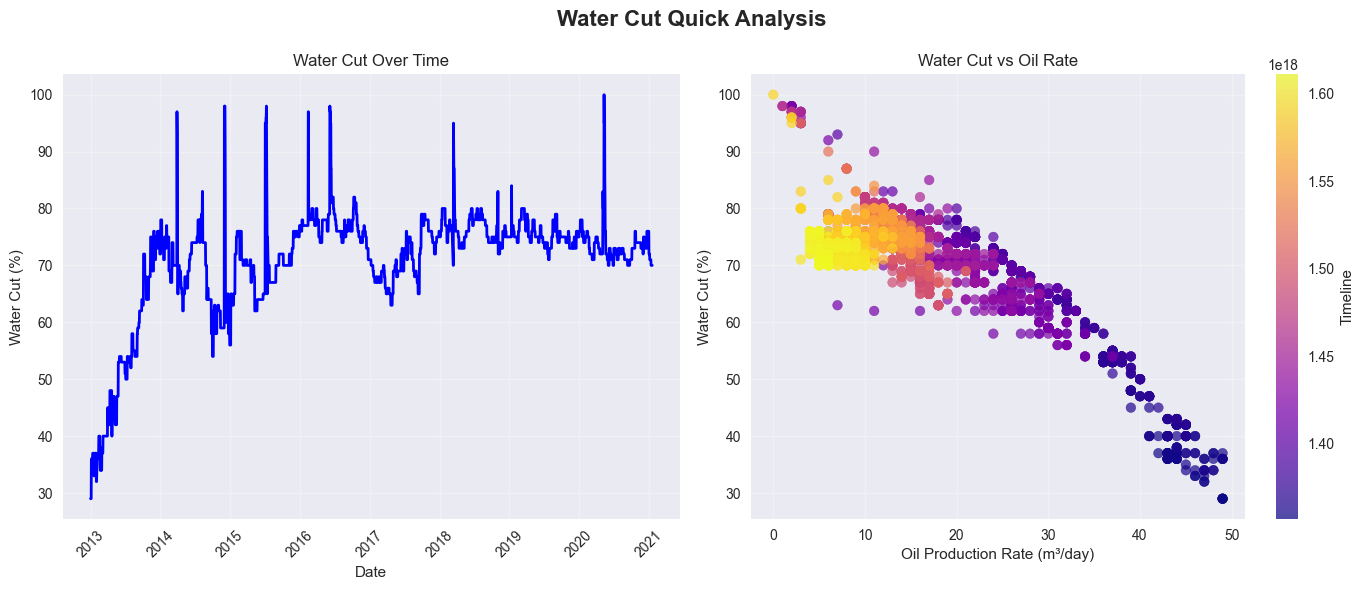

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def simple_water_analysis(df):
    """Quick visualization of water production behavior"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Water Cut Quick Analysis', fontsize=16, fontweight='bold')

    # Plot 1: Water Cut over Time
    axes[0].plot(df['Date'], df['Water cut (%)'], color='blue', linewidth=2)
    axes[0].set_title('Water Cut Over Time')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Water Cut (%)')
    axes[0].grid(True, alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)

    # Plot 2: Water Cut vs Oil Production
    scatter = axes[1].scatter(df['Oil volume (m3/day)'], df['Water cut (%)'],
                              c=df['Date'], cmap='plasma', alpha=0.7)
    axes[1].set_title('Water Cut vs Oil Rate')
    axes[1].set_xlabel('Oil Production Rate (m³/day)')
    axes[1].set_ylabel('Water Cut (%)')
    plt.colorbar(scatter, ax=axes[1], label='Timeline')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Run it
simple_water_analysis(df)


## EOR Visualization

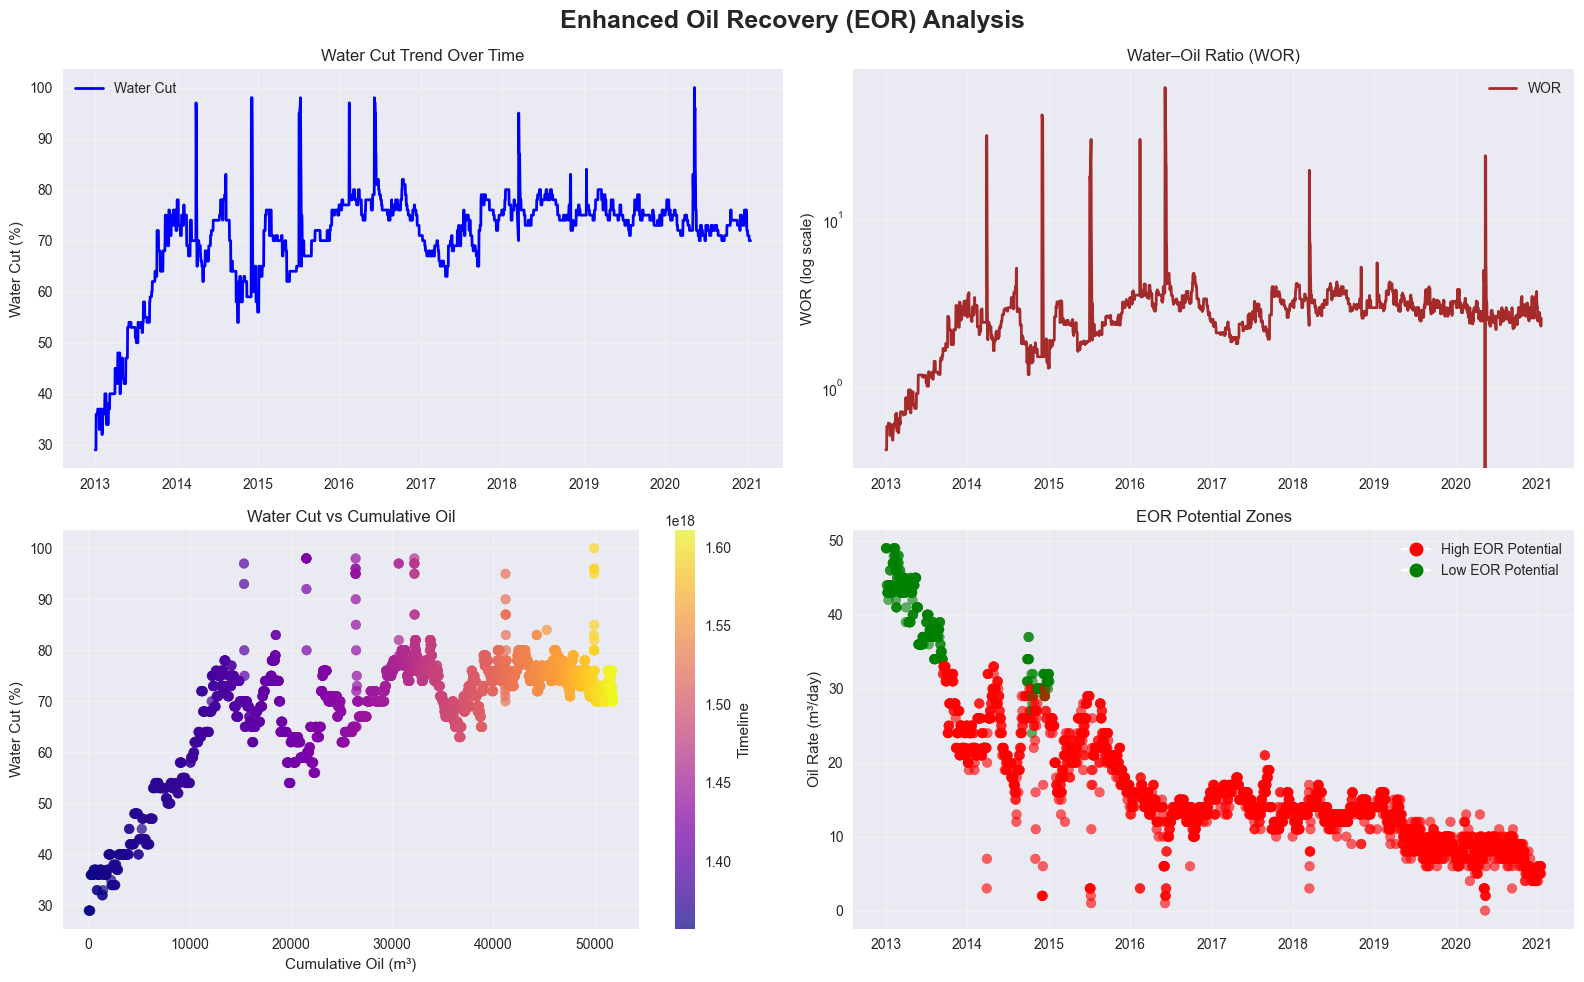

In [35]:
def create_eor_visualization(df):
    """Simple EOR potential visualization with legends"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Enhanced Oil Recovery (EOR) Analysis', fontsize=18, fontweight='bold')

    # 1️⃣ Water Cut vs Time
    axes[0,0].plot(df['Date'], df['Water cut (%)'], color='blue', linewidth=2, label='Water Cut')
    axes[0,0].set_title('Water Cut Trend Over Time')
    axes[0,0].set_ylabel('Water Cut (%)')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()

    # 2️⃣ WOR (Water-Oil Ratio)
    df['WOR'] = df['Water volume (m3/day)'] / df['Oil volume (m3/day)']
    df['WOR'] = df['WOR'].replace([np.inf, -np.inf], np.nan).fillna(0)
    axes[0,1].semilogy(df['Date'], df['WOR'], color='brown', linewidth=2, label='WOR')
    axes[0,1].set_title('Water–Oil Ratio (WOR)')
    axes[0,1].set_ylabel('WOR (log scale)')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()

    # 3️⃣ Water Cut vs Cumulative Oil
    scatter = axes[1,0].scatter(df['Cumulative_Oil'], df['Water cut (%)'],
                      c=df['Date'], cmap='plasma', alpha=0.7)
    axes[1,0].set_title('Water Cut vs Cumulative Oil')
    axes[1,0].set_xlabel('Cumulative Oil (m³)')
    axes[1,0].set_ylabel('Water Cut (%)')
    axes[1,0].grid(True, alpha=0.3)
    cbar = plt.colorbar(scatter, ax=axes[1,0])
    cbar.set_label('Timeline')

    # 4️⃣ EOR Decision Zone
    df['EOR_Potential'] = np.where(df['Water cut (%)'] > 60, 'High', 'Low')
    colors = df['EOR_Potential'].map({'High': 'red', 'Low': 'green'})
    axes[1,1].scatter(df['Date'], df['Oil volume (m3/day)'], c=colors, alpha=0.6)
    axes[1,1].set_title('EOR Potential Zones')
    axes[1,1].set_ylabel('Oil Rate (m³/day)')
    axes[1,1].grid(True, alpha=0.3)

    # ✳️ Legend for EOR Potential
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='High EOR Potential', markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Low EOR Potential', markerfacecolor='green', markersize=10)
    ]
    axes[1,1].legend(handles=legend_elements, loc='upper right')

    plt.tight_layout()
    plt.show()
    return fig

# Run EOR visualization
eor_fig = create_eor_visualization(df)


# 📊 Well #807 Production Performance Summary (2013–2021)

## 🔍 Executive Summary

Well #807, drilled in **2013** in northern Siberia to a depth of **2,400 m**, has exhibited a **classic decline profile** typical of mature oil wells. Over its operational life, the well has experienced:
- **~90% decline** in oil production,
- **Steady increase in water cut** (>90% in recent years),
- **>50% drop in reservoir pressure**.

A **significant operational disruption** occurred in **May 2020**, coinciding with global **Covid-19 lockdowns**, resulting in **zero oil production** on May 11, 2020. Recovery was partial and slow, indicating lasting operational impacts.

---

## 📈 Key Trends (2013–2021)

| Metric                     | 2013 (Start)        | 2021 (End)          | Change               |
|---------------------------|---------------------|---------------------|----------------------|
| **Oil Production**        | 45–50 m³/day        | 5–6 m³/day          | ↓ ~90%               |
| **Water Cut**             | ~30%                | >90%                | ↑ Severe watering out|
| **Reservoir Pressure**    | 214 atm             | ~100 atm            | ↓ >50%               |
| **Gas-Oil Ratio (GOR)**   | Stable (~13,000)    | Volatile post-2017  | ↑ Instability        |

---

## 🦠 Covid-19 Impact (2020)

- **May 11, 2020**: Oil production dropped to **0 m³/day** — the only zero-production day outside of mechanical failures.
- **Context**: Russia implemented strict lockdowns in spring 2020; field staffing, maintenance, and logistics were likely reduced.
- **Aftermath**: Production never fully recovered to pre-pandemic levels (which were already low, ~8–10 m³/day). This suggests:
  - Delayed or skipped maintenance,
  - Reduced operational hours,
  - Accelerated decline due to lack of intervention.

> 💡 **Interpretation**: While natural reservoir depletion is the primary driver of decline, the **Covid-19 pandemic acted as a catalyst**, exacerbating performance loss during a critical late-life phase.

---

## ⚙️ Operational Phases

### **Phase 1: Early Life (2013–2015)**
- High oil rates (40–50 m³/day)
- Water cut <50%
- Stable reservoir pressure (>200 atm)

### **Phase 2: Decline Acceleration (2016–2019)**
- Oil production fell below 20 m³/day
- Water cut consistently >70%
- Occasional short-term recoveries suggest minor workovers

### **Phase 3: Late Life & Pandemic (2020–2021)**
- Production stabilized at **5–10 m³/day**
- Water cut frequently >90%
- **Covid-19 caused a sharp operational halt in May 2020**
- No meaningful recovery post-event

---

## 📉 Economic & Technical Outlook

- **EOR potential is low**: High water cut and low pressure limit secondary recovery options.
- **Operating costs likely exceed revenue**: High water handling + minimal oil yield.
- **Decommissioning should be evaluated**: The well is nearing the end of its economic life.

---

## ✅ Conclusion

Well #807 follows a textbook production decline curve driven by **natural reservoir depletion**. The **Covid-19 pandemic in 2020** introduced a **non-technical but significant operational shock**, contributing to a **permanent drop in output** during its final productive years. Given current performance, continued operation is **marginally economical at best**.

> 📌 **Recommendation**: Consider well abandonment or inclusion in a field-wide EOR feasibility study — standalone intervention is unlikely to be cost-effective.
